In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt 

In [10]:
record_export_folder = 'EEG_Recordings'
keep_cols = ['Timestamp', 'EEG.Counter', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8']

def load_df(file_name):
    file_path = os.path.join(record_export_folder, file_name)
    return pd.read_csv(file_path, skiprows=0, header=1)

def trim_cols(df):
    return df[keep_cols]

In [11]:
df = trim_cols(load_df('sultan_checkerboard_1.csv'))

In [15]:
def plot_col_in_df(df, col):
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    plt.plot(df[col].values[:128]) 
    plt.show()

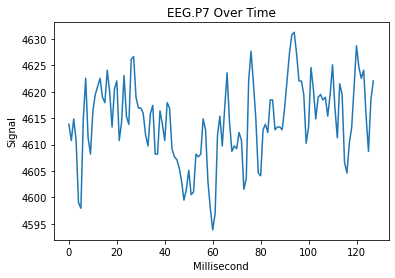

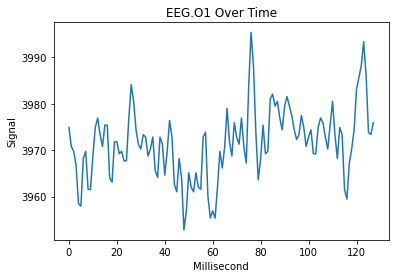

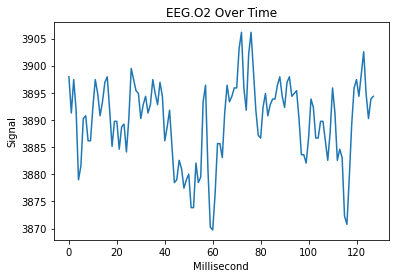

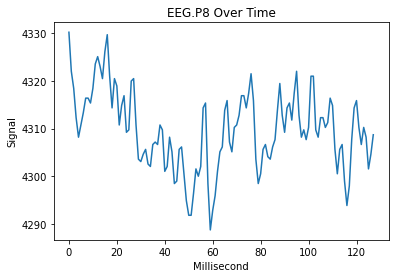

In [16]:
for col in df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df(df, col)

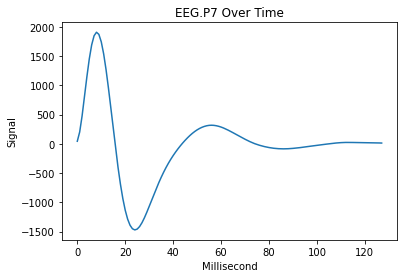

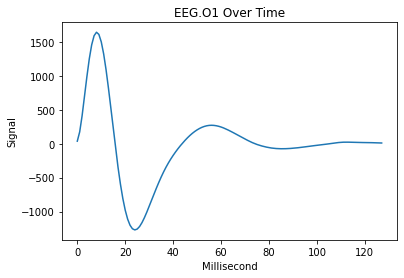

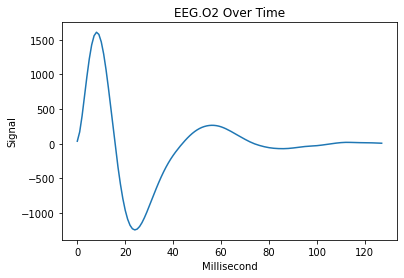

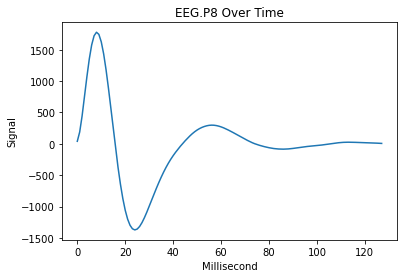

In [24]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def plot_col_in_df_filtered(df, col):
    fs = 512.0
    lowcut = 8.0
    highcut = 25.0
    
    plt.title("{} Over Time".format(col)) 
    plt.xlabel("Millisecond") 
    plt.ylabel("Signal") 
    
    vals = df[col].values[256:256+128]
    filtered = butter_bandpass_filter(vals, lowcut, highcut, fs)
    plt.plot(filtered) 
    plt.show()

def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    # data = data * 50    # amplify data
    y = lfilter(b, a, data)
    return y


# Sample rate and desired cutoff frequencies (in Hz).

# Plot the frequency response for a few different orders.
for col in df.columns:
    if 'Timestamp' != col and 'EEG.Counter' != col:
        plot_col_in_df_filtered(df, col)